text: Tu 	lemma: il	upos: PRON	xpos: _
text: as 	lemma: avoir	upos: AUX	xpos: _
text: choisi 	lemma: choisir	upos: VERB	xpos: _
text: laquelle 	lemma: lequel	upos: PRON	xpos: _
text: tu 	lemma: il	upos: PRON	xpos: _
text: vas 	lemma: vas	upos: VERB	xpos: _
text: manger 	lemma: manger	upos: VERB	xpos: _
text: ? 	lemma: ?	upos: PUNCT	xpos: _
Tu -> nsubj, 3, choisi
as -> aux, 3, choisi
choisi -> root, 0, _root_
laquelle -> obj, 6, vas
tu -> nsubj, 6, vas
vas -> ccomp, 3, choisi
manger -> xcomp, 6, vas
? -> punct, 3, choisi
('Tu', '3', 'nsubj')
('as', '3', 'aux')
('choisi', '0', 'root')
('laquelle', '6', 'obj')
('tu', '6', 'nsubj')
('vas', '3', 'ccomp')
('manger', '6', 'xcomp')
('?', '3', 'punct')


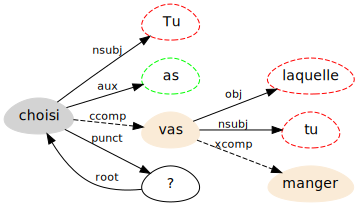

In [52]:
from sagas.nlu.corenlp_helper import get_nlp

class EnhancedViz(object):
    def __init__(self, shape='egg', size='8,5', fontsize=0):
        from graphviz import Digraph
        self.f = Digraph('deps', filename='deps.gv')
        self.f.attr(rankdir='LR', size=size)
        # font 'Calibri' support Arabic text
        self.f.attr('node', shape=shape, fontname='Calibri')
        if fontsize!=0:
            self.f.attr(fontsize=str(fontsize))

    def print_dependencies(self, doc, segs, node_maps, file=None):
        for dep_edge in doc.dependencies:
            print((dep_edge[2].text, dep_edge[0].index, dep_edge[1]), file=file)
            # head = int(dep_edge[0].index)
            # governor-id is index in words list + 1
            rel=dep_edge[1]
            if rel.endswith('comp'):
                self.f.attr('edge', style='dashed')
            else:
                self.f.attr('edge', style='filled')
            
            head = int(dep_edge[0].index)-1
            node_text=node_maps[dep_edge[2].text]
            self.f.edge(segs[head], node_text, label=rel, fontsize='11', fontname='Calibri')
            # self.f.edge(dep_edge[2].text, segs[head], label=dep_edge[1])

    def analyse(self, sents, nlp, node_maps=None):
        doc = nlp(sents)
        return self.analyse_doc(doc, node_maps)

    def analyse_doc(self, doc, node_maps=None):
        segs = []
        # omit {word.feats}
        print(*[f'text: {word.text+" "}\tlemma: {word.lemma}\tupos: {word.upos}\txpos: {word.xpos}' for sent in
                doc.sentences for word in sent.words], sep='\n')
        if node_maps is None:
            node_maps={}
            for word in doc.sentences[0].words:
                node_maps[word.text]=word.text        
        
        # self.f.attr(color='black')
        prop_sets={'VERB':lambda f: f.attr('node', style='filled', color='lightgrey'),
                   'PRON':lambda f: f.attr('node', style='dashed', color='red'),
                   'AUX':lambda f: f.attr('node', style='dashed', color='green'),
                   'NOUN':lambda f: f.attr('node', style='solid', color='blue'),
                  }
        sentence=doc.sentences[0]
        for word in sentence.words:
            rel=word.dependency_relation
            if rel.endswith('comp'):
                self.f.attr('node', style='filled', color='antiquewhite')
            elif word.upos in prop_sets:
                prop_sets[word.upos](self.f)
            else:
                self.f.attr('node', style='solid', color='black')
            head=''
            if word.governor == 0:
                head='_root_'
            else:
                head_word=sentence.words[word.governor-1]
                head=head_word.text
            print(f"{word.text} -> {rel}, {word.governor}, {head}")
            self.f.node(node_maps[word.text])
            segs.append(node_maps[word.text])

        # self.f.node_attr.update(color='black')
        self.print_dependencies(sentence, segs, node_maps)
        return self.f

def viz(sents, lang='fr'):
    nlp=get_nlp(lang)
    doc = nlp(sents)
    cv=EnhancedViz(shape='egg', size='8,5', fontsize=20)
    return cv.analyse_doc(doc, None)

viz("Tu as choisi laquelle tu vas manger ?")

text: I 	lemma: I	upos: PRON	xpos: PRP
text: am 	lemma: be	upos: AUX	xpos: VBP
text: a 	lemma: a	upos: DET	xpos: DT
text: student 	lemma: student	upos: NOUN	xpos: NN
I -> nsubj, 4, student
am -> cop, 4, student
a -> det, 4, student
student -> root, 0, _root_
('I', '4', 'nsubj')
('am', '4', 'cop')
('a', '4', 'det')
('student', '0', 'root')


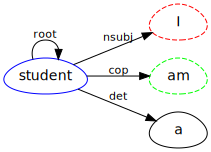

In [53]:
viz('I am a student', 'en')

text: 彼ら 	lemma: 彼ら	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: 3月 	lemma: 3月	upos: NOUN	xpos: _
text: に 	lemma: に	upos: ADP	xpos: _
text: 訪ね 	lemma: 訪ねる	upos: VERB	xpos: _
text: て 	lemma: て	upos: SCONJ	xpos: _
text: 来 	lemma: 来る	upos: AUX	xpos: _
text: ます 	lemma: ます	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
彼ら -> nsubj, 5, 訪ね
は -> case, 1, 彼ら
3月 -> iobj, 5, 訪ね
に -> case, 3, 3月
訪ね -> root, 0, _root_
て -> mark, 5, 訪ね
来 -> aux, 5, 訪ね
ます -> aux, 5, 訪ね
。 -> punct, 5, 訪ね
('彼ら', '5', 'nsubj')
('は', '1', 'case')
('3月', '5', 'iobj')
('に', '3', 'case')
('訪ね', '0', 'root')
('て', '5', 'mark')
('来', '5', 'aux')
('ます', '5', 'aux')
('。', '5', 'punct')


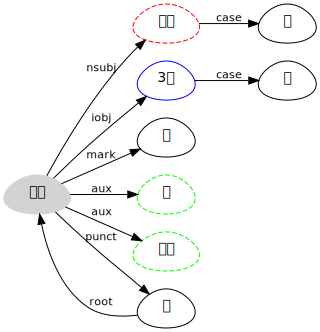

In [55]:
viz('彼らは3月に訪ねて来ます。', 'ja')

[Synset('apple.n.01'), Synset('apple.n.02')]
apple.n.01, edible_fruit.n.01, pome.n.01 ...
apple.n.02, apple_tree.n.01, fruit_tree. ...


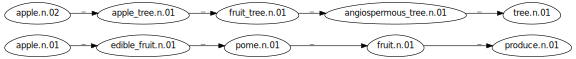

In [37]:
from nltk.corpus import wordnet as wn

hypo = lambda s: s.hyponyms()
hyper = lambda s: s.hypernyms()

class WordNetViz(object):
    def __init__(self, shape='egg', size='8,8', fontsize=0):
        from graphviz import Digraph, Graph
        self.f = Digraph('deps', filename='deps.gv')
        # self.f = Graph('G', filename='process.gv')
        self.f.attr(rankdir='LR', size=size)
        # font 'Calibri' support Arabic text
        self.f.attr('node', shape=shape, fontname='Calibri')
        if fontsize!=0:
            self.f.attr(fontsize=str(fontsize))
    
    def add_tuples(self, tuples):
        for t in tuples:
            self.f.edge(t[0], t[1], label='_')
        return self.f
    
    def get_inherited(self, word, pos, clo, top=3, max=4):        
        sets = wn.synsets(word, pos)       
        print(sets)
        for s in sets[:top]:
            rs=[s.name()]
            ss = list(s.closure(clo))
            # for w in ss[:top]:
            for w in ss:
                rs.extend([w.name() for w in ss])
            
            count=len(rs)-1
            if max!=-1 and count>max:
                count=max
            print(', '.join(rs)[:40], '...')
            for n in range(count):
                self.f.edge(rs[n], rs[n+1], label='_')
        return self.f
    
    def get_hyper(self, word, pos):
        return self.get_inherited(word, pos, hyper)

wnet=WordNetViz()
# wnet.add_tuples([('a','b'), ('a','c')])
wnet.get_hyper('apple', 'n')